In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lats = np.random.uniform(-90.000, 90.000, size = 1500)
longs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lon = zip(lats, longs)
lat_lon

In [3]:
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
coordinates = list(lat_lon)

In [5]:
from citipy import citipy

In [6]:
# Create list of unique cities
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

625

In [7]:
# Create storage for weather data of cities
city_data = []

# Import dependencies
from config import weather_api_key
import time
from datetime import datetime
import requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Log data collection
print("Data Collection Start         ")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through cities
for i, j in enumerate(cities):
    
    # Log in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + j.replace(" ","+")
    
    # Output logged city
    print(f"Processing Record {record_count} of Set {set_count} | {j}")
    
    # Increment record count
    record_count += 1
    
    # Run an API request for each city
    try:
        # Parse the JSON
        city_weather = requests.get(city_url).json()
        
        # Parse required data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_tmp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list
        city_data.append({"City": j.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_tmp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    except:
        print("City not found. Skipping...")
        pass

# Loading complete
print("----------------------")
print("Data Collection End")
print("----------------------")

Data Collection Start         
------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | los llanos de aridane
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | hukuntsi
Processing Record 9 of Set 1 | erzin
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | trincomalee
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | turukhansk
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | araouane
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | ahipara
Processing Record 21 of Set 1 | mys shmidta
City not found. Sk

Processing Record 36 of Set 4 | hermanus
Processing Record 37 of Set 4 | kazan
Processing Record 38 of Set 4 | vilyuysk
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | muravlenko
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | diffa
Processing Record 43 of Set 4 | saint quentin
City not found. Skipping...
Processing Record 44 of Set 4 | berlevag
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | zyryanka
Processing Record 47 of Set 4 | camacha
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | mandalgovi
Processing Record 50 of Set 4 | businga
Processing Record 1 of Set 5 | manzhouli
Processing Record 2 of Set 5 | manyana
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | keti bandar
Processing Record 5 of Set 5 | sabzevar
Processing Record 6 of Set 5 | baiyin
Processing Record 7 of Set 5 | rawson
Processing Record 8 of Set 5 | isangel
Processing Record 9 of Set 5 | codrington
Pro

Processing Record 28 of Set 8 | baruun-urt
Processing Record 29 of Set 8 | sabha
Processing Record 30 of Set 8 | amarante do maranhao
Processing Record 31 of Set 8 | aswan
Processing Record 32 of Set 8 | soe
Processing Record 33 of Set 8 | ouadda
Processing Record 34 of Set 8 | indramayu
Processing Record 35 of Set 8 | fuxin
Processing Record 36 of Set 8 | mogadishu
Processing Record 37 of Set 8 | marystown
Processing Record 38 of Set 8 | blagoveshchenka
Processing Record 39 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 8 | plaster rock
Processing Record 41 of Set 8 | conde
Processing Record 42 of Set 8 | beringovskiy
Processing Record 43 of Set 8 | itarema
Processing Record 44 of Set 8 | dvinskoy
Processing Record 45 of Set 8 | tanout
Processing Record 46 of Set 8 | garissa
Processing Record 47 of Set 8 | groningen
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | falam
Processing Record 50 of Set 8 | mendi
Processing Record 

Processing Record 15 of Set 12 | kuching
Processing Record 16 of Set 12 | alice springs
Processing Record 17 of Set 12 | zimmi
Processing Record 18 of Set 12 | baoying
Processing Record 19 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 20 of Set 12 | bourail
Processing Record 21 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 22 of Set 12 | cherskiy
Processing Record 23 of Set 12 | tezu
Processing Record 24 of Set 12 | arcata
Processing Record 25 of Set 12 | luangwa
Processing Record 26 of Set 12 | at-bashi
Processing Record 27 of Set 12 | panzhihua
Processing Record 28 of Set 12 | karratha
Processing Record 29 of Set 12 | shumikha
Processing Record 30 of Set 12 | griffith
Processing Record 31 of Set 12 | maassluis
Processing Record 32 of Set 12 | nancha
Processing Record 33 of Set 12 | mattawa
Processing Record 34 of Set 12 | amuntai
Processing Record 35 of Set 12 | anahuac
Processing Record 36 of Set 12 | progreso
Processing Record 37 of Set

In [9]:
# Convert array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,35.76,85,100,17.74,GL,2021-12-14 03:32:39
1,Jamestown,42.0970,-79.2353,42.12,59,1,1.99,US,2021-12-14 03:32:33
2,Hobart,-42.8794,147.3294,75.27,60,40,16.11,AU,2021-12-14 03:31:30
3,Bambous Virieux,-20.3428,57.7575,80.22,73,40,10.36,MU,2021-12-14 03:32:40
4,Los Llanos De Aridane,28.6585,-17.9182,58.75,68,0,7.00,ES,2021-12-14 03:32:40
5,Geraldton,-28.7667,114.6000,74.12,46,0,24.16,AU,2021-12-14 03:19:41
6,Nikolskoye,59.7035,30.7861,31.39,96,76,5.97,RU,2021-12-14 03:22:53
7,Hukuntsi,-24.0000,21.7500,75.22,52,5,10.92,BW,2021-12-14 03:32:40
8,Erzin,36.9559,36.2000,59.52,53,100,5.48,TR,2021-12-14 03:32:41
9,Rikitea,-23.1203,-134.9692,78.57,75,87,4.90,PF,2021-12-14 03:32:41


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-12-14 03:32:39,65.6145,-37.6368,35.76,85,100,17.74
1,Jamestown,US,2021-12-14 03:32:33,42.0970,-79.2353,42.12,59,1,1.99
2,Hobart,AU,2021-12-14 03:31:30,-42.8794,147.3294,75.27,60,40,16.11
3,Bambous Virieux,MU,2021-12-14 03:32:40,-20.3428,57.7575,80.22,73,40,10.36
4,Los Llanos De Aridane,ES,2021-12-14 03:32:40,28.6585,-17.9182,58.75,68,0,7.00
...,...,...,...,...,...,...,...,...,...
569,Coahuayana,MX,2021-12-14 03:35:08,18.7333,-103.6833,73.51,91,0,3.09
570,Egvekinot,RU,2021-12-14 03:35:08,66.3167,-179.1667,-16.42,70,100,9.78
571,Wewak,PG,2021-12-14 03:35:09,-3.5534,143.6268,83.97,79,57,3.91
572,Masaka,UG,2021-12-14 03:35:09,-0.3338,31.7341,63.19,80,75,4.38


In [12]:
# Output CSV file
output_file = "weather_data/cities.csv"
city_data_df.to_csv(output_file, index_label="City_ID")

In [13]:
# Plotting relevant data

# Extract data from dataframe
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

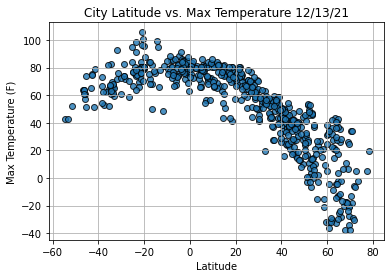

In [15]:
import time

# Scatter plot for Latitude vs Max Temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

plt.show()

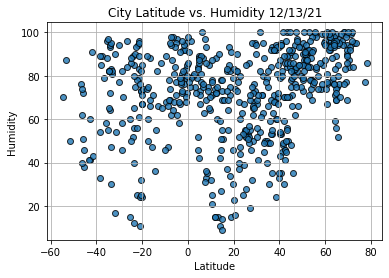

In [17]:
# Scatter plot for Latitude vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

plt.show()

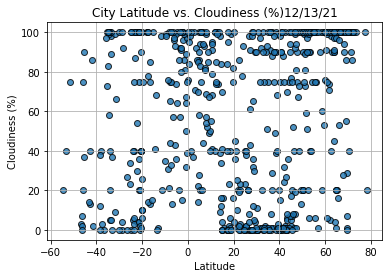

In [18]:
# Scatter plot for Latitude vs Cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Other graph properties
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

plt.show()

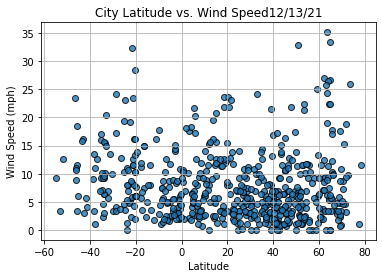

In [19]:
# Scatter plot for Latitude vs Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Other graph properties
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

plt.show()